In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [165]:

from sklearn import metrics, linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from scipy.optimize import curve_fit
from sklearn.svm import SVC
from random import sample
from sklearn.linear_model import LinearRegression


import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

## Data Loading and Cleaning
Cleaning and exploring the current data to understand what information. 

In [20]:
airport_data = pd.read_csv('Documents\BainAirlineTaskDatasets\Flight_on_time_HIX.csv')
weather_data = pd.read_csv('Documents\BainAirlineTaskDatasets\weather.csv')

In [21]:
airport_data.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,2019-12-01,IYF,HIX,678.0,1,103.0,62.0,15.0,118.0,127,219.0,52.0,7.0,212.0,LateAircraft
1,TR,3776,GDISCI,2019-12-01,HEN,HIX,1700.0,10,25.0,15.0,21.0,46.0,616,624.0,8.0,27.0,557.0,NaN
2,RO,4754,GHHWLL,2019-12-01,HIX,IZN,413.0,10,10.0,0.0,15.0,25.0,242,227.0,0.0,5.0,222.0,NaN
3,XM,5604,GBGWFC,2019-12-01,HIX,IZU,130.0,10,44.0,34.0,34.0,118.0,111,155.0,44.0,4.0,151.0,Weather
4,XM,5612,GBISBC,2019-12-01,HIX,LKF,258.0,10,234.0,144.0,26.0,300.0,132,358.0,146.0,6.0,352.0,Carrier


In [22]:
airport_data.shape

(65669, 18)

In [23]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65669 entries, 0 to 65668
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Airline                   65669 non-null  object 
 1   Flight_Number             65669 non-null  int64  
 2   Plane_ID                  65669 non-null  object 
 3   FlightDate                65669 non-null  object 
 4   Origin_Airport            65669 non-null  object 
 5   Destination_Airport       65669 non-null  object 
 6   Flight_Distance           65669 non-null  float64
 7   Scheduled_Departure_Time  65669 non-null  int64  
 8   Actual_Departure_Time     65669 non-null  float64
 9   Departure_Delay_Minutes   65669 non-null  float64
 10  Departure_Taxi            65669 non-null  float64
 11  Departure_WheelsOff       65669 non-null  float64
 12  Scheduled_Arrival_Time    65669 non-null  int64  
 13  Actual_Arrival_Time       65669 non-null  float64
 14  Arriva

In [24]:
airport_data.isnull().sum()

Airline                         0
Flight_Number                   0
Plane_ID                        0
FlightDate                      0
Origin_Airport                  0
Destination_Airport             0
Flight_Distance                 0
Scheduled_Departure_Time        0
Actual_Departure_Time           0
Departure_Delay_Minutes         0
Departure_Taxi                  0
Departure_WheelsOff             0
Scheduled_Arrival_Time          0
Actual_Arrival_Time             0
Arrival_Delay_Minutes           0
Arrival_Taxi                    0
Arrival_WheelsOn                0
Delay_Reason                51588
dtype: int64

Found that the column for Delay_Reason has a large volume of missing rows.

## EDA on DATA

In [25]:
airport_data.columns

Index(['Airline', 'Flight_Number', 'Plane_ID', 'FlightDate', 'Origin_Airport',
       'Destination_Airport', 'Flight_Distance', 'Scheduled_Departure_Time',
       'Actual_Departure_Time', 'Departure_Delay_Minutes', 'Departure_Taxi',
       'Departure_WheelsOff', 'Scheduled_Arrival_Time', 'Actual_Arrival_Time',
       'Arrival_Delay_Minutes', 'Arrival_Taxi', 'Arrival_WheelsOn',
       'Delay_Reason'],
      dtype='object')

In [31]:
airport_data.Origin_Airport.unique()
##airport_data.Airline.unique()

# The dataset has more than just CA airline information. Per the instructions: filter for airline CA airport HIX


array(['IYF', 'HEN', 'HIX', 'TLM', 'UKP', 'ERM', 'IYR', 'ERR', 'LWI',
       'LVU', 'UFC', 'EJY', 'LPL', 'BRB', 'QEU', 'UFM', 'WWQ', 'FJH',
       'FYE', 'VCN', 'YRL', 'YJX', 'HDU', 'VFO', 'XRO', 'XNL', 'KUO',
       'FVG', 'LGC', 'FJJ', 'VCY', 'KJN', 'FCC', 'IZU', 'MMW', 'WRS',
       'TMF', 'VDB', 'CCH', 'WTU', 'KFW', 'TSY', 'BTN', 'FTC', 'UEU',
       'UZM', 'BEX', 'ULZ', 'EEE', 'MLF', 'MPM', 'EZN', 'TKQ', 'WJG',
       'YEN', 'FSM', 'LSH', 'LXZ', 'AJP', 'MFF', 'FTI', 'YCF', 'EXU',
       'XIC', 'FBY', 'YNU', 'IZN', 'LLR', 'UNC', 'XMP', 'ZIL', 'VDR',
       'ERH', 'TQI', 'VFM', 'WSK', 'LKF', 'EVR', 'FZU', 'VNU', 'LUZ',
       'VMA', 'VDC', 'ZJI', 'UDC', 'TKF', 'IUR', 'MLM', 'ING', 'WKQ',
       'VZX', 'TCV', 'LCW', 'TSK', 'XCJ', 'LAW', 'FJS', 'NZH', 'TMJ',
       'WVH', 'VRE', 'ZIV', 'VYU', 'AGH', 'CWE', 'UYG', 'LDZ', 'KZW',
       'UUF', 'IMX', 'ISC', 'CRR', 'LRH', 'MGU', 'FYN', 'IRB', 'HXM',
       'ZJJ', 'FUN', 'BCG', 'VYI', 'KFU', 'HIZ', 'LRN', 'VRY', 'LEU',
       'VYM', 'LTY',

In [64]:
CA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 23 to 65649
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Airline                   5256 non-null   object        
 1   Flight_Number             5256 non-null   int64         
 2   Plane_ID                  5256 non-null   object        
 3   FlightDate                5256 non-null   datetime64[ns]
 4   Origin_Airport            5256 non-null   object        
 5   Destination_Airport       5256 non-null   object        
 6   Flight_Distance           5256 non-null   float64       
 7   Scheduled_Departure_Time  5256 non-null   int64         
 8   Actual_Departure_Time     5256 non-null   int32         
 9   Departure_Delay_Minutes   5256 non-null   int32         
 10  Departure_Taxi            5256 non-null   float64       
 11  Departure_WheelsOff       5256 non-null   float64       
 12  Scheduled_Arrival_

In [52]:
CA_data['FlightDate'] =  pd.to_datetime(CA_data['FlightDate'], infer_datetime_format=True)


In [60]:
CA_data['Actual_Departure_Time'] = CA_data['Actual_Departure_Time'].astype(int)

C:\Users\standard\AppData\Local\Temp/ipykernel_18324/1119112851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['Actual_Departure_Time'] = CA_data['Actual_Departure_Time'].astype(int)


In [62]:
CA_data['Departure_Delay_Minutes'] = CA_data['Departure_Delay_Minutes'].astype(int)

C:\Users\standard\AppData\Local\Temp/ipykernel_18324/1995114356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['Departure_Delay_Minutes'] = CA_data['Departure_Delay_Minutes'].astype(int)


In [32]:
CA_data = airport_data[(airport_data['Origin_Airport']== 'HIX') & (airport_data['Airline'] == 'CA')]

In [34]:
#CA_data.info()

CA_data.isnull().sum()

Airline                        0
Flight_Number                  0
Plane_ID                       0
FlightDate                     0
Origin_Airport                 0
Destination_Airport            0
Flight_Distance                0
Scheduled_Departure_Time       0
Actual_Departure_Time          0
Departure_Delay_Minutes        0
Departure_Taxi                 0
Departure_WheelsOff            0
Scheduled_Arrival_Time         0
Actual_Arrival_Time            0
Arrival_Delay_Minutes          0
Arrival_Taxi                   0
Arrival_WheelsOn               0
Delay_Reason                3940
dtype: int64

In [55]:
CA_data.head()

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason,format
23,CA,6752,GBHWFM,2019-12-01,HIX,VYM,760.0,15,14.0,0.0,28.0,42.0,333,335.0,2.0,4.0,331.0,NaN,1
24,CA,7217,GJGUFK,2019-12-01,HIX,TMJ,632.0,15,11.0,0.0,25.0,36.0,310,259.0,0.0,3.0,256.0,NaN,1
25,CA,7225,GBFVFM,2019-12-01,HIX,VCN,599.0,15,138.0,83.0,16.0,154.0,316,433.0,77.0,5.0,428.0,Weather,1
26,CA,7240,GHMUFY,2019-12-01,HIX,FTC,403.0,15,17.0,2.0,23.0,40.0,149,147.0,0.0,4.0,143.0,NaN,1
124,CA,4955,GCKVFM,2019-12-01,HIX,CWE,740.0,600,1405.0,485.0,38.0,1443.0,917,1802.0,525.0,15.0,1747.0,Carrier,1


In [63]:
CA_data['Actual_Arrival_Time'] = CA_data['Actual_Arrival_Time'].astype(int)

C:\Users\standard\AppData\Local\Temp/ipykernel_18324/2783511185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_data['Actual_Arrival_Time'] = CA_data['Actual_Arrival_Time'].astype(int)


In [109]:
edited_data = CA_data.drop(['Delay_Reason','format'], axis = 1)
edited_data2 = CA_data.drop(['Delay_Reason','format'], axis = 1)

In [67]:
edited_data.isnull().sum()

Airline                     0
Flight_Number               0
Plane_ID                    0
FlightDate                  0
Origin_Airport              0
Destination_Airport         0
Flight_Distance             0
Scheduled_Departure_Time    0
Actual_Departure_Time       0
Departure_Delay_Minutes     0
Departure_Taxi              0
Departure_WheelsOff         0
Scheduled_Arrival_Time      0
Actual_Arrival_Time         0
Arrival_Delay_Minutes       0
Arrival_Taxi                0
Arrival_WheelsOn            0
dtype: int64

In [68]:
edited_data.describe()

,Flight_Number,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn
count,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5.256000e+03,5256.000000,5256.000000
mean,5589.393836,475.685312,1444.872717,1452.845129,21.814688,25.385845,1491.290335,1609.288242,1592.264460,5.871659e+02,6.356164,1594.683029
std,1173.385666,303.966587,460.456955,468.555654,75.707728,13.891995,471.151777,503.821171,522.624731,3.519666e+04,4.911418,512.357693
min,4264.000000,67.000000,15.000000,11.000000,0.000000,8.000000,2.000000,3.000000,1.000000,0.000000e+00,1.000000,1.000000
25%,4436.000000,235.000000,1015.000000,1033.000000,0.000000,17.000000,1106.000000,1233.000000,1227.000000,0.000000e+00,4.000000,1226.000000
50%,5043.000000,409.000000,1443.500000,1448.500000,0.000000,22.000000,1509.000000,1653.000000,1638.000000,0.000000e+00,5.000000,1635.500000
75%,6750.250000,607.000000,1836.000000,1847.000000,13.000000,29.000000,1921.000000,2046.000000,2042.000000,1.500000e+01,7.000000,2043.000000
max,7310.000000,1780.000000,2245.000000,2350.000000,1110.000000,156.000000,2355.000000,2359.000000,2400.000000,2.510000e+06,160.000000,2400.000000


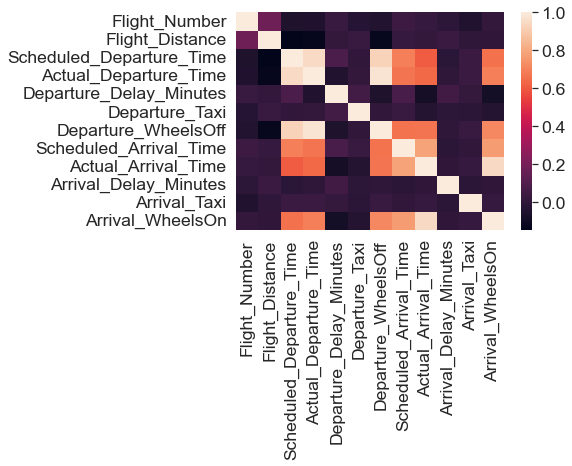

In [71]:
edited_data.corr()

# calculate the correlation matrix
corr = edited_data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [87]:
#dited_data.Destination_Airport.value_counts().plot()

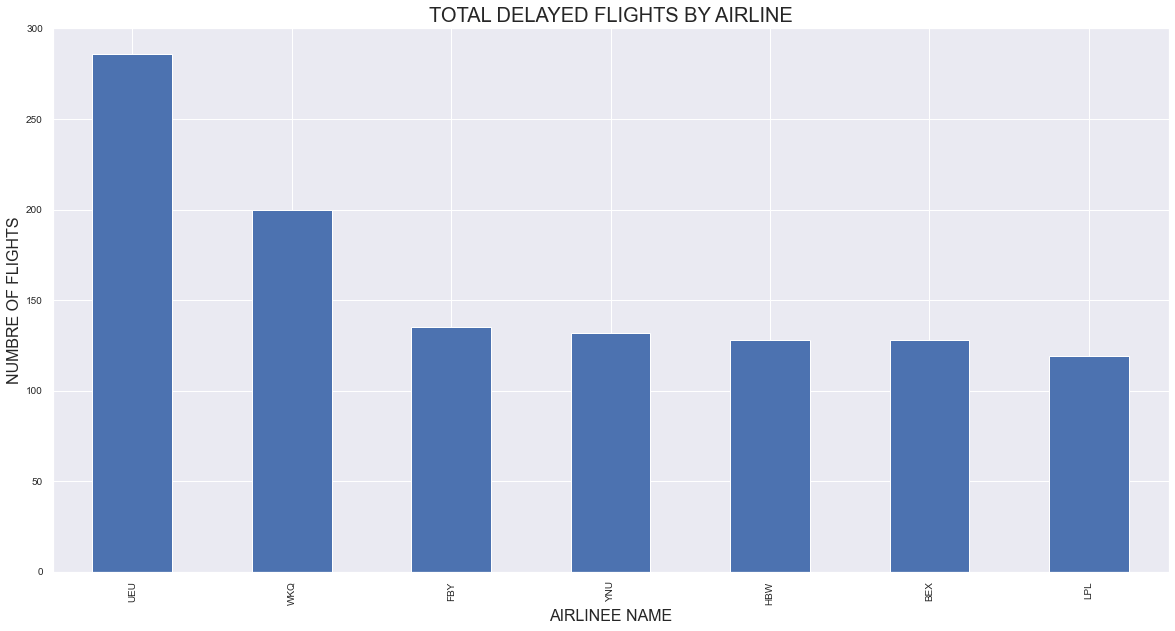

In [86]:
plt.figure(figsize=(20, 10))
edited_data.groupby('Destination_Airport').Airline.count().sort_values(ascending=False)[:7].plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('Destination', fontsize=16)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [26]:
weather_data.head()

,Unnamed: 0,airport,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,1,Highland,2019-11-30 00:00:00,Overcast,0.0000,0.00,37.30,32.11,32.47,0.82,...,6.70,8.06,141.090120,1.00,0,10.0,309.69,NaN,NaN,2019-11-30 00:00:00
1,2,Highland,2019-11-30 01:00:00,Possible Drizzle,0.0018,0.35,37.74,33.16,32.10,0.80,...,5.77,7.58,110.003815,0.95,0,10.0,309.09,rain,NaN,2019-11-30 01:00:00
2,3,Highland,2019-11-30 02:00:00,Possible Drizzle,0.0062,0.54,37.60,31.13,32.41,0.83,...,8.04,8.57,112.053620,1.00,0,10.0,308.70,rain,NaN,2019-11-30 02:00:00
3,4,Highland,2019-11-30 03:00:00,Light Rain,0.0135,0.71,36.60,29.78,31.76,0.83,...,8.90,9.84,103.033220,1.00,0,10.0,309.40,rain,NaN,2019-11-30 03:00:00
4,5,Highland,2019-11-30 04:00:00,Overcast,0.0007,0.06,36.65,31.12,32.41,0.85,...,6.95,8.95,104.085209,1.00,0,10.0,311.82,rain,NaN,2019-11-30 04:00:00


In [27]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1536 non-null   int64  
 1   airport              1536 non-null   object 
 2   time                 1536 non-null   object 
 3   summary              1536 non-null   object 
 4   precipIntensity      1536 non-null   float64
 5   precipProbability    1536 non-null   float64
 6   temperature          1536 non-null   float64
 7   apparentTemperature  1536 non-null   float64
 8   dewPoint             1536 non-null   float64
 9   humidity             1536 non-null   float64
 10  pressure             1536 non-null   float64
 11  windSpeed            1536 non-null   float64
 12  windGust             1536 non-null   float64
 13  windBearing          1536 non-null   float64
 14  cloudCover           1536 non-null   float64
 15  uvIndex              1536 non-null   i

In [28]:
weather_data.shape
# 

(1536, 21)

In [93]:
weather_data.isnull().sum()

Unnamed: 0                0
airport                   0
time                      0
summary                   0
precipIntensity           0
precipProbability         0
temperature               0
apparentTemperature       0
dewPoint                  0
humidity                  0
pressure                  0
windSpeed                 0
windGust                  0
windBearing               0
cloudCover                0
uvIndex                   0
visibility                0
ozone                     0
precipType             1220
precipAccumulation     1455
time2                     0
dtype: int64

In [95]:
weather_data.dropna()
weather_data.columns

Index(['Unnamed: 0', 'airport', 'time', 'summary', 'precipIntensity',
       'precipProbability', 'temperature', 'apparentTemperature', 'dewPoint',
       'humidity', 'pressure', 'windSpeed', 'windGust', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility', 'ozone', 'precipType',
       'precipAccumulation', 'time2'],
      dtype='object')

In [98]:
weather_data.airport.unique()

array(['HIX', 'Eureka'], dtype=object)

In [97]:
weather_data['airport'] = weather_data['airport'].str.replace('Highland', 'HIX', True)

In [100]:
CAweather_data = weather_data[(weather_data['airport']== 'HIX')]
CAweather_data.airport.unique()

array(['HIX'], dtype=object)

In [101]:
CAweather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           768 non-null    int64  
 1   airport              768 non-null    object 
 2   time                 768 non-null    object 
 3   summary              768 non-null    object 
 4   precipIntensity      768 non-null    float64
 5   precipProbability    768 non-null    float64
 6   temperature          768 non-null    float64
 7   apparentTemperature  768 non-null    float64
 8   dewPoint             768 non-null    float64
 9   humidity             768 non-null    float64
 10  pressure             768 non-null    float64
 11  windSpeed            768 non-null    float64
 12  windGust             768 non-null    float64
 13  windBearing          768 non-null    float64
 14  cloudCover           768 non-null    float64
 15  uvIndex              768 non-null    int

In [111]:
edited_data2.columns = edited_data2.columns.str.lower()


In [112]:
edited_data2.rename(columns = {'origin_airport':'airport'}, inplace = True)

In [113]:
edited_data2.columns

Index(['airline', 'flight_number', 'plane_id', 'flightdate', 'airport',
       'destination_airport', 'flight_distance', 'scheduled_departure_time',
       'actual_departure_time', 'departure_delay_minutes', 'departure_taxi',
       'departure_wheelsoff', 'scheduled_arrival_time', 'actual_arrival_time',
       'arrival_delay_minutes', 'arrival_taxi', 'arrival_wheelson'],
      dtype='object')

In [150]:
df_airports2 = pd.merge(edited_data2, CAweather_data, on='airport')

## Merged Datasets on Airport
 - conducted additional EDA on data set

In [151]:
df_airports2.describe()

,flight_number,flight_distance,scheduled_departure_time,actual_departure_time,departure_delay_minutes,departure_taxi,departure_wheelsoff,scheduled_arrival_time,actual_arrival_time,arrival_delay_minutes,...,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipAccumulation
count,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,...,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,162936.000000
mean,5.589394e+03,4.756853e+02,1.444873e+03,1.452845e+03,2.181469e+01,2.538584e+01,1.491290e+03,1.609288e+03,1.592264e+03,5.871659e+02,...,7.146354e-01,1.016309e+03,8.219297e+00,1.085047e+01,2.216724e+02,5.975651e-01,2.200521e-01,9.472691e+00,3.339641e+02,0.017913
std,1.173274e+03,3.039377e+02,4.604132e+02,4.685111e+02,7.570053e+01,1.389068e+01,4.711070e+02,5.037733e+02,5.225751e+02,3.519332e+04,...,1.314408e-01,9.561761e+00,3.634596e+00,6.223111e+00,6.955537e+01,3.500338e-01,4.387055e-01,1.391285e+00,3.027246e+01,0.019765
min,4.264000e+03,6.700000e+01,1.500000e+01,1.100000e+01,0.000000e+00,8.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,...,2.300000e-01,9.930400e+02,5.100000e-01,7.500000e-01,8.510003e-03,0.000000e+00,0.000000e+00,8.480000e-01,2.685700e+02,0.002200
25%,4.436000e+03,2.350000e+02,1.015000e+03,1.033000e+03,0.000000e+00,1.700000e+01,1.106000e+03,1.233000e+03,1.227000e+03,0.000000e+00,...,6.400000e-01,1.010197e+03,5.675000e+00,6.757500e+00,1.870273e+02,2.600000e-01,0.000000e+00,1.000000e+01,3.136450e+02,0.003700
50%,5.043000e+03,4.090000e+02,1.443500e+03,1.448500e+03,0.000000e+00,2.200000e+01,1.509000e+03,1.653000e+03,1.638000e+03,0.000000e+00,...,7.400000e-01,1.017680e+03,8.085000e+00,9.940000e+00,2.180339e+02,6.600000e-01,0.000000e+00,1.000000e+01,3.354550e+02,0.008600
75%,6.750250e+03,6.070000e+02,1.836000e+03,1.847000e+03,1.300000e+01,2.900000e+01,1.921000e+03,2.046000e+03,2.042000e+03,1.500000e+01,...,8.000000e-01,1.024137e+03,1.040250e+01,1.324750e+01,2.692992e+02,9.500000e-01,0.000000e+00,1.000000e+01,3.531025e+02,0.030200
max,7.310000e+03,1.780000e+03,2.245000e+03,2.350000e+03,1.110000e+03,1.560000e+02,2.355000e+03,2.359000e+03,2.400000e+03,2.510000e+06,...,9.900000e-01,1.034260e+03,2.030000e+01,3.430000e+01,3.570199e+02,1.000000e+00,2.000000e+00,1.000000e+01,4.235600e+02,0.083800


In [119]:
df_airports = df_airports.drop(['Unnamed: 0', 'precipAccumulation','precipType' ], axis = 1)

In [118]:
df_airports = df_airports.drop(['Unnamed: 0',], axis = 1)
df_airports.isnull().sum()

airline                     0
flight_number               0
plane_id                    0
flightdate                  0
airport                     0
destination_airport         0
flight_distance             0
scheduled_departure_time    0
actual_departure_time       0
departure_delay_minutes     0
departure_taxi              0
departure_wheelsoff         0
scheduled_arrival_time      0
actual_arrival_time         0
arrival_delay_minutes       0
arrival_taxi                0
arrival_wheelson            0
Unnamed: 0                  0
time                        0
summary                     0
precipIntensity             0
precipProbability           0
temperature                 0
apparentTemperature         0
dewPoint                    0
humidity                    0
pressure                    0
windSpeed                   0
windGust                    0
windBearing                 0
cloudCover                  0
uvIndex                     0
visibility                  0
ozone     

In [134]:
df_airports.describe()

,flight_number,flight_distance,scheduled_departure_time,actual_departure_time,departure_delay_minutes,departure_taxi,departure_wheelsoff,scheduled_arrival_time,actual_arrival_time,arrival_delay_minutes,...,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone
count,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,...,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06,4.036608e+06
mean,5.589394e+03,4.756853e+02,1.444873e+03,1.452845e+03,2.181469e+01,2.538584e+01,1.491290e+03,1.609288e+03,1.592264e+03,5.871659e+02,...,2.556904e+01,7.146354e-01,1.016309e+03,8.219297e+00,1.085047e+01,2.216724e+02,5.975651e-01,2.200521e-01,9.472691e+00,3.339641e+02
std,1.173274e+03,3.039377e+02,4.604132e+02,4.685111e+02,7.570053e+01,1.389068e+01,4.711070e+02,5.037733e+02,5.225751e+02,3.519332e+04,...,1.240202e+01,1.314408e-01,9.561761e+00,3.634596e+00,6.223111e+00,6.955537e+01,3.500338e-01,4.387055e-01,1.391285e+00,3.027246e+01
min,4.264000e+03,6.700000e+01,1.500000e+01,1.100000e+01,0.000000e+00,8.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,...,-1.304000e+01,2.300000e-01,9.930400e+02,5.100000e-01,7.500000e-01,8.510003e-03,0.000000e+00,0.000000e+00,8.480000e-01,2.685700e+02
25%,4.436000e+03,2.350000e+02,1.015000e+03,1.033000e+03,0.000000e+00,1.700000e+01,1.106000e+03,1.233000e+03,1.227000e+03,0.000000e+00,...,1.998000e+01,6.400000e-01,1.010197e+03,5.675000e+00,6.757500e+00,1.870273e+02,2.600000e-01,0.000000e+00,1.000000e+01,3.136450e+02
50%,5.043000e+03,4.090000e+02,1.443500e+03,1.448500e+03,0.000000e+00,2.200000e+01,1.509000e+03,1.653000e+03,1.638000e+03,0.000000e+00,...,2.584500e+01,7.400000e-01,1.017680e+03,8.085000e+00,9.940000e+00,2.180339e+02,6.600000e-01,0.000000e+00,1.000000e+01,3.354550e+02
75%,6.750250e+03,6.070000e+02,1.836000e+03,1.847000e+03,1.300000e+01,2.900000e+01,1.921000e+03,2.046000e+03,2.042000e+03,1.500000e+01,...,3.241000e+01,8.000000e-01,1.024137e+03,1.040250e+01,1.324750e+01,2.692992e+02,9.500000e-01,0.000000e+00,1.000000e+01,3.531025e+02
max,7.310000e+03,1.780000e+03,2.245000e+03,2.350000e+03,1.110000e+03,1.560000e+02,2.355000e+03,2.359000e+03,2.400000e+03,2.510000e+06,...,5.515000e+01,9.900000e-01,1.034260e+03,2.030000e+01,3.430000e+01,3.570199e+02,1.000000e+00,2.000000e+00,1.000000e+01,4.235600e+02


In [155]:
df_airports2['day_of_week'] = df_airports2['flightdate'].dt.day_name()

In [153]:
df_airports2.columns

Index(['airline', 'flight_number', 'plane_id', 'flightdate', 'airport',
       'destination_airport', 'flight_distance', 'scheduled_departure_time',
       'actual_departure_time', 'departure_delay_minutes', 'departure_taxi',
       'departure_wheelsoff', 'scheduled_arrival_time', 'actual_arrival_time',
       'arrival_delay_minutes', 'arrival_taxi', 'arrival_wheelson',
       'Unnamed: 0', 'time', 'summary', 'precipIntensity', 'precipProbability',
       'temperature', 'apparentTemperature', 'dewPoint', 'humidity',
       'pressure', 'windSpeed', 'windGust', 'windBearing', 'cloudCover',
       'uvIndex', 'visibility', 'ozone', 'precipType', 'precipAccumulation',
       'time2'],
      dtype='object')

In [157]:
df_airports2['status'] = np.where(df_airports2['departure_delay_minutes'] >= 15, True, False)
df_airports2.head()

,airline,flight_number,plane_id,flightdate,airport,destination_airport,flight_distance,scheduled_departure_time,actual_departure_time,departure_delay_minutes,...,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2,day_of_week,status
0,CA,6752,GBHWFM,2019-12-01,HIX,VYM,760.0,15,14,0,...,141.090120,1.00,0,10.0,309.69,NaN,NaN,2019-11-30 00:00:00,Sunday,False
1,CA,6752,GBHWFM,2019-12-01,HIX,VYM,760.0,15,14,0,...,110.003815,0.95,0,10.0,309.09,rain,NaN,2019-11-30 01:00:00,Sunday,False
2,CA,6752,GBHWFM,2019-12-01,HIX,VYM,760.0,15,14,0,...,112.053620,1.00,0,10.0,308.70,rain,NaN,2019-11-30 02:00:00,Sunday,False
3,CA,6752,GBHWFM,2019-12-01,HIX,VYM,760.0,15,14,0,...,103.033220,1.00,0,10.0,309.40,rain,NaN,2019-11-30 03:00:00,Sunday,False
4,CA,6752,GBHWFM,2019-12-01,HIX,VYM,760.0,15,14,0,...,104.085209,1.00,0,10.0,311.82,rain,NaN,2019-11-30 04:00:00,Sunday,False


In [152]:
df_airports2['departure_delay_minutes'].unique()

array([   0,   83,    2,  485,   37,   14,   32,   50,   38,    9,    8,
         91,    3,   12,   97,    1,   21,   92,   57,   40,   43,    5,
         33,    4,   55,   24,   16,    7,   41,   10,   39,   22,   88,
         25,  165,   11,   19,  101,    6,  110,   64,   18,   66,  725,
         81,   36,  185,  141,  107,   76,   95,   44,   73,  139,  622,
         42,  192,   90,   48,   70,   26,  119,  191,   63,  202,   61,
        284,   31,   35,   52,   53,   23,   30,   68,   17,  127,  208,
         49,  205,   93,  157,   77,   28,   20,  112,   13,  247,  158,
        149,  131,  128,   46,   89,   45,  113,   74,   71,   29,  252,
        245,   34,   51,   47,  163,   54,  121,  138,   65,  234,   27,
         59,   79,   56,   62,  242,   15,  692,   75,   60,  102,   94,
        114,  155,   78,  189,   80,  148,  109,   72,  123,  118,  116,
         69,   84,  673,   58,  147,  637,  412,   67,  104,  843,   85,
        108,  203,  126,  662,  580,  170,  278,  4

In [171]:
df_airports2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4036608 entries, 0 to 4036607
Data columns (total 39 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   airline                   object        
 1   flight_number             int64         
 2   plane_id                  object        
 3   flightdate                datetime64[ns]
 4   airport                   object        
 5   destination_airport       object        
 6   flight_distance           float64       
 7   scheduled_departure_time  int64         
 8   actual_departure_time     int32         
 9   departure_delay_minutes   int32         
 10  departure_taxi            float64       
 11  departure_wheelsoff       float64       
 12  scheduled_arrival_time    int64         
 13  actual_arrival_time       int32         
 14  arrival_delay_minutes     float64       
 15  arrival_taxi              float64       
 16  arrival_wheelson          float64       
 17  Unnamed:

In [189]:
df_airports2.dropna(inplace = True)

# Linear Regression 
## Features, Labels, Training and Test Data Creation

In [190]:
# Create features (X) and labels (y)
y = df_airports2['status']
X = df_airports2.drop(['status','airline', 'flightdate', 'flight_number', 'plane_id', 'airport',
       'destination_airport','Unnamed: 0', 'time', 'summary', 'day_of_week','precipType',
       'time2'], axis=1)

In [191]:
# Perform the split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)


In [192]:
lr = LinearRegression()

In [194]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [197]:
from sklearn.metrics import mean_squared_error

In [198]:
print(mean_squared_error(y_test, y_pred))

0.10665498467980164


## Recommendations 


Insights - additional investigation on the data set is needed to review what days are traveled most frequently. 
Are the staffing levels involved in the delays?
How is the data gathered? Who is being impacted the most in December? 
Is there any basis in the data that we can investigate further to improve customer satisification? 

Who are we surveying? During this time there is on average an increased delay in flights due to the volume and the season impact that occurs worldwide. 